In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
from scipy import stats


# Data Cleaning and EDA 

In [3]:
punks = pd.read_csv('./data/punks.csv')
punks_2 = pd.read_csv('./data/punks_2.csv')
attrs = pd.read_csv('./data/punkattrs.csv')

In [4]:
punks

,Unnamed: 0,url,type,from,to,amount,date
0,0,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
1,1,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
2,2,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021"
3,3,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020"
4,4,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020"
...,...,...,...,...,...,...,...
65759,30710,https://www.larvalabs.com/cryptopunks/details/...,Sold,0xb38071,0x717403,0.05Ξ ($13),"Jul 01, 2017"
65760,30711,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x717403,NaN,0.05Ξ ($13),"Jun 26, 2017"
65761,30712,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0xb38071,NaN,"Jun 23, 2017"
65762,30713,https://www.larvalabs.com/cryptopunks/details/...,Transfer,0xcbd482,0x577ebc,NaN,"Jan 31, 2021"


In [5]:
punks_2

,Unnamed: 0,url,type,from,to,amount,date
0,0,https://www.larvalabs.com/cryptopunks/details/...,Bid,0xc7c6b9,NaN,<0.01Ξ ($<0.01),"Dec 16, 2020"
1,1,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x005612,NaN,"Jun 23, 2017"
2,2,https://www.larvalabs.com/cryptopunks/details/...,Transfer,0x00bd9f,0xca8fe4,NaN,"Mar 08, 2018"
3,3,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x00bd9f,NaN,"Jun 23, 2017"
4,4,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"12Ξ ($20,941)","Feb 10, 2021"
...,...,...,...,...,...,...,...
10257,10257,https://www.larvalabs.com/cryptopunks/details/...,Bid,0xa0a59c,NaN,0.25Ξ ($69),"Jul 03, 2017"
10258,10258,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x717403,NaN,0.20Ξ ($51),"Jun 26, 2017"
10259,10259,https://www.larvalabs.com/cryptopunks/details/...,Bid,ddaavvee,NaN,0.20Ξ ($65),"Jun 23, 2017"
10260,10260,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x5b098b,NaN,0.15Ξ ($50),"Jun 23, 2017"


In [6]:
# pulled data in two batches, need to concat the two dfs
punks = pd.concat([punks, punks_2])
punks

,Unnamed: 0,url,type,from,to,amount,date
0,0,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
1,1,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
2,2,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021"
3,3,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020"
4,4,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020"
...,...,...,...,...,...,...,...
10257,10257,https://www.larvalabs.com/cryptopunks/details/...,Bid,0xa0a59c,NaN,0.25Ξ ($69),"Jul 03, 2017"
10258,10258,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x717403,NaN,0.20Ξ ($51),"Jun 26, 2017"
10259,10259,https://www.larvalabs.com/cryptopunks/details/...,Bid,ddaavvee,NaN,0.20Ξ ($65),"Jun 23, 2017"
10260,10260,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x5b098b,NaN,0.15Ξ ($50),"Jun 23, 2017"


In [7]:
# drop unnamed column 
punks.drop(columns=['Unnamed: 0'], inplace=True)
punks.head()

,url,type,from,to,amount,date
0,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
1,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
2,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021"
3,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020"
4,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020"


In [8]:
# webscraping pulled duplicates a few times 
# need to drop them 
punks.drop_duplicates(inplace=True)
punks.reset_index(inplace=True, drop=True)
punks

,url,type,from,to,amount,date
0,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
1,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017"
2,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021"
3,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020"
4,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020"
...,...,...,...,...,...,...
69253,https://www.larvalabs.com/cryptopunks/details/...,Bid,0xa0a59c,NaN,0.25Ξ ($69),"Jul 03, 2017"
69254,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x717403,NaN,0.20Ξ ($51),"Jun 26, 2017"
69255,https://www.larvalabs.com/cryptopunks/details/...,Bid,ddaavvee,NaN,0.20Ξ ($65),"Jun 23, 2017"
69256,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x5b098b,NaN,0.15Ξ ($50),"Jun 23, 2017"


In [9]:
punks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69258 entries, 0 to 69257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     69258 non-null  object
 1   type    69258 non-null  object
 2   from    36608 non-null  object
 3   to      27489 non-null  object
 4   amount  47252 non-null  object
 5   date    69258 non-null  object
dtypes: object(6)
memory usage: 3.2+ MB


### Create id column 

In [10]:
# create id
x = []
for _ in range(len(punks)): 
    x.append(punks['url'][_])
punk_ids = []

# create list of ids
for i in range(len(x)): 
    y = [j for j in x[i] if j.isdigit()]
    punk_ids.append(int(''.join(y)))

# create column 
punks['id'] = punk_ids
punks.head()

,url,type,from,to,amount,date,id
0,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017",8181
1,https://www.larvalabs.com/cryptopunks/details/...,Claimed,NaN,0x6611fe,NaN,"Jun 23, 2017",8182
2,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021",8183
3,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020",8183
4,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020",8183


### EDA of type column 

In [11]:
punks['type'].unique()

array(['Claimed', 'Offered', 'Sold', 'Bid Withdrawn', 'Bid', '(Unwrap)',
       '(Wrap)', 'Transfer', 'Offer Withdrawn'], dtype=object)

In [12]:
punks['type'].value_counts()

Offered            19486
Bid                12748
Claimed            10000
Sold                8424
Bid Withdrawn       6594
Transfer            6304
Offer Withdrawn     3164
(Wrap)              1483
(Unwrap)            1055
Name: type, dtype: int64

<Figure size 3600x3600 with 0 Axes>

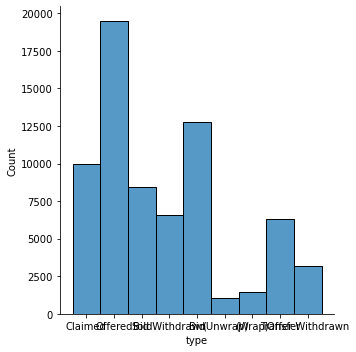

In [13]:
plt.figure(figsize=(50,50))
sns.displot(punks, x="type")

- way more offers and bids 
- half as many sales as offers, which is concerning 

In [14]:
# drop claimed because all of the punks were claimed for free
punks = punks[punks['type'] != 'Claimed']

In [15]:
# check how many unique punks have been transfered
len(punks[punks['type'] == 'Transfer']['id'].unique())

4275

- it might be useful to count the number of times any given punk was transfered.

In [16]:
# create transfer count column (might be useful)
transfer_count = punks[punks['type'] == 'Transfer'].groupby('id')['type'].count()
transfer_count_df = pd.DataFrame(transfer_count)
transfer_count_df.reset_index(inplace=True)
transfer_count_df.rename(columns={'id':'id1'}, inplace=True)
transfer_count_df.head()

,id1,type
0,0,1
1,1,5
2,5,2
3,39,2
4,49,2


In [17]:
# merge dfs by id 
punks = pd.merge(punks, transfer_count_df, left_on='id', right_on='id1', how='left').drop('id1', axis=1)
punks.rename(columns={'type_y':'transfer_count', 'type_x':'tx_type', 'id':'punk_id'}, inplace=True) 
punks['transfer_count'].fillna(0, inplace=True)
punks

,url,tx_type,from,to,amount,date,punk_id,transfer_count
0,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021",8183,0.0
1,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020",8183,0.0
2,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020",8183,0.0
3,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.50Ξ ($1,337)","May 27, 2020",8183,0.0
4,https://www.larvalabs.com/cryptopunks/details/...,Bid,Pranksy,NaN,3.50Ξ ($720),"May 27, 2020",8183,0.0
...,...,...,...,...,...,...,...,...
59253,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x7760e0,NaN,0.25Ξ ($69),"Jul 03, 2017",9999,1.0
59254,https://www.larvalabs.com/cryptopunks/details/...,Bid,0xa0a59c,NaN,0.25Ξ ($69),"Jul 03, 2017",9999,1.0
59255,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x717403,NaN,0.20Ξ ($51),"Jun 26, 2017",9999,1.0
59256,https://www.larvalabs.com/cryptopunks/details/...,Bid,ddaavvee,NaN,0.20Ξ ($65),"Jun 23, 2017",9999,1.0


In [18]:
punks['transfer_count'].unique()

array([0., 1., 5., 6., 4., 2., 3., 7., 8., 9.])

1.3337096000000002


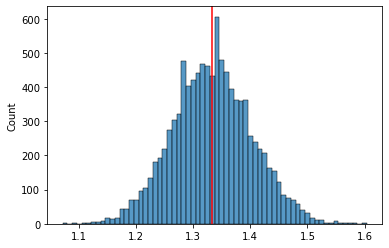

In [19]:
sample_means = []
for i in range(10000):
    s = np.random.choice(punks['transfer_count'], size = 500, replace = False) 
    x_bar = s.mean()
    sample_means.append(x_bar)

sns.histplot(sample_means)
plt.axvline(np.mean(sample_means), color = 'r');
print(np.mean(sample_means))

C:\Users\tsuts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transfer_count'>

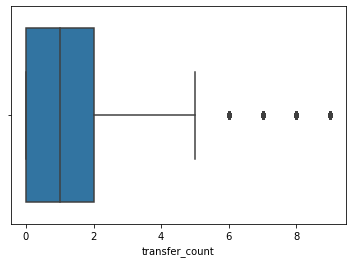

In [20]:
sns.boxplot(punks['transfer_count'])

- Given distribution, a lot of the data indicates that the majority of punks have only been distributed less than two times
- Perhaps using transfer counts won't be that important 

In [21]:
# drop Transfer tx_type
punks = punks[punks['tx_type'] != 'Transfer']
punks.head(25)

,url,tx_type,from,to,amount,date,punk_id,transfer_count
0,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021",8183,0.0
1,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020",8183,0.0
2,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020",8183,0.0
3,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.50Ξ ($1,337)","May 27, 2020",8183,0.0
4,https://www.larvalabs.com/cryptopunks/details/...,Bid,Pranksy,NaN,3.50Ξ ($720),"May 27, 2020",8183,0.0
5,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,1.20Ξ ($199),"Jan 15, 2020",8183,0.0
6,https://www.larvalabs.com/cryptopunks/details/...,Bid,Pranksy,NaN,1.20Ξ ($196),"Jan 14, 2020",8183,0.0
7,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,0x22160e,NaN,0.40Ξ ($78),"Jul 19, 2017",8183,0.0
8,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x22160e,NaN,0.40Ξ ($78),"Jul 19, 2017",8183,0.0
9,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x6611fe,0x5b098b,0.25Ξ ($66),"Jul 06, 2017",8183,0.0


### Clean amount column 

In [22]:
# check for null values 
punks.isnull().sum()

url                   0
tx_type               0
from              22650
to                41768
amount             5702
date                  0
punk_id               0
transfer_count        0
dtype: int64

- I can't simply drop null values because some txs have important information and have null values by nature of the way the data is recorded  
- Null values suggest either these punks were transfered from wallet to wallet, the offer was withdrawn

In [23]:
# fill NaN values with string to match rest of column
punks.reset_index(inplace=True, drop=True)
punks['amount'].fillna('no_amount', inplace=True)
punks.head(25)

C:\Users\tsuts\anaconda3\lib\site-packages\pandas\core\series.py:4433: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,url,tx_type,from,to,amount,date,punk_id,transfer_count
0,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021",8183,0.0
1,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020",8183,0.0
2,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020",8183,0.0
3,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.50Ξ ($1,337)","May 27, 2020",8183,0.0
4,https://www.larvalabs.com/cryptopunks/details/...,Bid,Pranksy,NaN,3.50Ξ ($720),"May 27, 2020",8183,0.0
5,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,1.20Ξ ($199),"Jan 15, 2020",8183,0.0
6,https://www.larvalabs.com/cryptopunks/details/...,Bid,Pranksy,NaN,1.20Ξ ($196),"Jan 14, 2020",8183,0.0
7,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,0x22160e,NaN,0.40Ξ ($78),"Jul 19, 2017",8183,0.0
8,https://www.larvalabs.com/cryptopunks/details/...,Bid,0x22160e,NaN,0.40Ξ ($78),"Jul 19, 2017",8183,0.0
9,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x6611fe,0x5b098b,0.25Ξ ($66),"Jul 06, 2017",8183,0.0


In [24]:
# split amount column 
z = []
for _ in range(len(punks['amount'])):
    if punks['amount'][_] != 'no_amount':
        z.append(punks['amount'][_].split('Ξ'))
    else: 
        z.append('no_amount')
z

[['99.99', ' ($172,678)'],
 ['6.50', ' ($2,472)'],
 ['3.50', ' ($724)'],
 ['6.50', ' ($1,337)'],
 ['3.50', ' ($720)'],
 ['1.20', ' ($199)'],
 ['1.20', ' ($196)'],
 ['0.40', ' ($78)'],
 ['0.40', ' ($78)'],
 ['0.25', ' ($66)'],
 ['0.25', ' ($66)'],
 ['0.05', ' ($13)'],
 ['<0.01', ' ($<0.01)'],
 ['25', ' ($33,249)'],
 ['22', ' ($29,260)'],
 ['22', ' ($28,960)'],
 ['10', ' ($13,519)'],
 ['10', ' ($12,895)'],
 ['25', ' ($32,783)'],
 'no_amount',
 ['7.09', ' ($10,031)'],
 'no_amount',
 ['50', ' ($10,007)'],
 ['1.95', ' ($603)'],
 ['1', ' ($169)'],
 ['1', ' ($169)'],
 ['1.95', ' ($319)'],
 ['0.75', ' ($117)'],
 ['0.75', ' ($117)'],
 ['0.54', ' ($98)'],
 ['0.54', ' ($73)'],
 ['1.35', ' ($215)'],
 ['2', ' ($1,570)'],
 'no_amount',
 ['2', ' ($598)'],
 ['0.80', ' ($246)'],
 ['1.70', ' ($381)'],
 ['1.44', ' ($312)'],
 ['3.40', ' ($670)'],
 ['0.25', ' ($72)'],
 ['0.25', ' ($72)'],
 ['0.05', ' ($13)'],
 ['9', ' ($15,532)'],
 ['9', ' ($15,544)'],
 ['16', ' ($6,145)'],
 'no_amount',
 'no_amount',
 ['1

In [25]:
# create column for eth_amount
eth_amount = []
for i in range(len(z)):
    if z[i] == 'no_amount':
        eth_amount.append('no_amount')
    else:
        eth_amount.append((z[i][0]))

        
punks['eth_amount'] = eth_amount

<ipython-input-25-e12da1c97bf1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punks['eth_amount'] = eth_amount


In [26]:
eth_amount[0:10]

['99.99',
 '6.50',
 '3.50',
 '6.50',
 '3.50',
 '1.20',
 '1.20',
 '0.40',
 '0.40',
 '0.25']

In [27]:
# create column for dollar_amount
dollar_amount = []
for i in range(len(z)):
    if z[i] == 'no_amount':
        dollar_amount.append('no_amount')
    else:
        dollar_amount.append((z[i][1]))

        
punks['dollar_amount'] = dollar_amount


<ipython-input-27-2f9322fa750c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punks['dollar_amount'] = dollar_amount


In [28]:
dollar_amount[0:10]

[' ($172,678)',
 ' ($2,472)',
 ' ($724)',
 ' ($1,337)',
 ' ($720)',
 ' ($199)',
 ' ($196)',
 ' ($78)',
 ' ($78)',
 ' ($66)']

In [29]:
punks.head()

,url,tx_type,from,to,amount,date,punk_id,transfer_count,eth_amount,dollar_amount
0,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021",8183,0.0,99.99,"($172,678)"
1,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020",8183,0.0,6.50,"($2,472)"
2,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020",8183,0.0,3.50,($724)
3,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.50Ξ ($1,337)","May 27, 2020",8183,0.0,6.50,"($1,337)"
4,https://www.larvalabs.com/cryptopunks/details/...,Bid,Pranksy,NaN,3.50Ξ ($720),"May 27, 2020",8183,0.0,3.50,($720)


In [30]:
# clean eth_amount and dollar_amount columns 
# remove <
punks['eth_amount'] = punks['eth_amount'].map(lambda x: x.lstrip('<'))
punks['eth_amount'].unique()

<ipython-input-30-0eb458780172>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punks['eth_amount'] = punks['eth_amount'].map(lambda x: x.lstrip('<'))


array(['99.99', '6.50', '3.50', ..., '10.1K', '10.01K', '999.12K'],
      dtype=object)

In [31]:
# remove K from string
remove_chars = []
count =0
for i in punks['eth_amount']: 
    if i[-1] == 'K':
        count+=1
        remove_chars.append(i.replace('K', '000'))
    elif i[-1] == 'Y': 
        remove_chars.append(i.replace('Y', ''))
    elif i[-1] == 'Z': 
        remove_chars.append(i.replace('Z', ''))
    else:
        remove_chars.append(i)

punks['eth_amount'] = remove_chars
count

<ipython-input-31-80fc75688800>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punks['eth_amount'] = remove_chars


43

In [32]:
#remove commas from string 
no_commas = []
for i in punks['eth_amount']: 
    no_commas.append(i.replace(',', ''))
punks['eth_amount'] = no_commas

<ipython-input-32-ebb19f82d03b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  punks['eth_amount'] = no_commas


In [33]:
# remove absurd, completely irrelevant values
punks = punks[punks['eth_amount']!='1,000,000,000,000,000,000']
punks = punks[punks['eth_amount'] != '1M']
punks = punks[punks['eth_amount'] != '90T']


In [34]:
# remove symbols from dollar_amount column 
# convert to float
punks['dollar_amount'] = punks['dollar_amount'].str.replace(r'\D', '')
punks['dollar_amount']

<ipython-input-34-698c0768c695>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  punks['dollar_amount'] = punks['dollar_amount'].str.replace(r'\D', '')


0        172678
1          2472
2           724
3          1337
4           720
          ...  
52949        69
52950        69
52951        51
52952        65
52953        50
Name: dollar_amount, Length: 52952, dtype: object

In [35]:
punks.head()

,url,tx_type,from,to,amount,date,punk_id,transfer_count,eth_amount,dollar_amount
0,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"99.99Ξ ($172,678)","Feb 11, 2021",8183,0.0,99.99,172678
1,https://www.larvalabs.com/cryptopunks/details/...,Sold,0x5b098b,CryptoNo…,"6.50Ξ ($2,472)","Sep 20, 2020",8183,0.0,6.50,2472
2,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020",8183,0.0,3.50,724
3,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.50Ξ ($1,337)","May 27, 2020",8183,0.0,6.50,1337
4,https://www.larvalabs.com/cryptopunks/details/...,Bid,Pranksy,NaN,3.50Ξ ($720),"May 27, 2020",8183,0.0,3.50,720


#### Investigate Unwrap and Wrap tx_type

In [36]:
punks['tx_type'].value_counts()

Offered            19484
Bid                12748
Sold                8424
Bid Withdrawn       6594
Offer Withdrawn     3164
(Wrap)              1483
(Unwrap)            1055
Name: tx_type, dtype: int64

In [37]:
punks[punks['tx_type'] == '(Unwrap)']

,url,tx_type,from,to,amount,date,punk_id,transfer_count,eth_amount,dollar_amount
19,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,0x7fbc25,no_amount,"Jan 27, 2021",8187,1.0,no_amount,
45,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,likeit,no_amount,"Oct 13, 2020",8188,5.0,no_amount,
88,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,Sylveste…,no_amount,"Oct 16, 2020",8190,6.0,no_amount,
91,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,Sylveste…,no_amount,"Sep 28, 2020",8190,6.0,no_amount,
94,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,0x2306e1,no_amount,"Sep 27, 2020",8190,6.0,no_amount,
...,...,...,...,...,...,...,...,...,...,...
52826,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,MBK,no_amount,"Jan 11, 2021",9972,2.0,no_amount,
52831,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,MBK,no_amount,"Oct 04, 2020",9972,2.0,no_amount,
52901,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,cryptohu…,no_amount,"Jan 27, 2021",9997,4.0,no_amount,
52903,https://www.larvalabs.com/cryptopunks/details/...,(Unwrap),WrappedC…,cryptohu…,no_amount,"Jan 03, 2021",9997,4.0,no_amount,


In [38]:
punks[punks['tx_type'] == '(Wrap)']['eth_amount'].unique()

array(['no_amount'], dtype=object)

- wrapping a punk means converting it to an erc721 (a modified erc20)
- it appears that unwrapping and wrapping punks does not require any transfer amount of eth 
- therefore, I will remove it from the data

In [39]:
punks = punks[punks['tx_type'] != '(Unwrap)']
punks = punks[punks['tx_type'] != '(Wrap)']
punks['tx_type'].unique()

array(['Offered', 'Sold', 'Bid Withdrawn', 'Bid', 'Offer Withdrawn'],
      dtype=object)

### Investigate BidWithdrawn tx_type

In [40]:
punks[punks['tx_type'] == 'Bid Withdrawn']

,url,tx_type,from,to,amount,date,punk_id,transfer_count,eth_amount,dollar_amount
2,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,3.50Ξ ($724),"May 28, 2020",8183,0.0,3.50,724
5,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Pranksy,NaN,1.20Ξ ($199),"Jan 15, 2020",8183,0.0,1.20,199
7,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,0x22160e,NaN,0.40Ξ ($78),"Jul 19, 2017",8183,0.0,0.40,78
14,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,Michel_M…,NaN,"22Ξ ($29,260)","Feb 01, 2021",8187,1.0,22,29260
16,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,0xb166dd,NaN,"10Ξ ($13,519)","Jan 28, 2021",8187,1.0,10,13519
...,...,...,...,...,...,...,...,...,...,...
52918,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,0x717403,NaN,0.15Ξ ($47),"Jun 28, 2017",9997,4.0,0.15,47
52924,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,TokenAng…,NaN,2.50Ξ ($366),"Jan 11, 2020",9999,1.0,2.50,366
52928,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,0x43b89f,NaN,0.10Ξ ($38),"Aug 30, 2017",9999,1.0,0.10,38
52930,https://www.larvalabs.com/cryptopunks/details/...,Bid Withdrawn,0xa0a59c,NaN,1Ξ ($203),"Jul 26, 2017",9999,1.0,1,203


- Withdrawn bids are important because they represent the value at which a buy is willing to pay for a punk which might be important for modelling a theoretical price for a punk and comparing it to the floor price of a punk 


#### Create date time column 


In [41]:
punks['date'].dtype

dtype('O')

In [42]:
punks['date'] = pd.to_datetime(punks['date'])
punks['date']

0       2021-02-11
1       2020-09-20
2       2020-05-28
3       2020-05-27
4       2020-05-27
           ...    
52949   2017-07-03
52950   2017-07-03
52951   2017-06-26
52952   2017-06-23
52953   2017-06-23
Name: date, Length: 50414, dtype: datetime64[ns]

In [43]:
# just want to see offers on 2/11
x = punks[punks['date'] == '2021-02-11']
x[x['tx_type']=='Offered'].tail(50)

,url,tx_type,from,to,amount,date,punk_id,transfer_count,eth_amount,dollar_amount
28112,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,0xb1adce,"390Ξ ($674,790)",2021-02-11,5217,4.0,390,674790
28259,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"199.99Ξ ($353,492)",2021-02-11,5234,0.0,199.99,353492
29010,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"8.24Ξ ($14,797)",2021-02-11,5354,2.0,8.24,14797
29331,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.99Ξ ($12,552)",2021-02-11,5404,1.0,6.99,12552
32591,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.75Ξ ($11,779)",2021-02-11,5973,1.0,6.75,11779
32737,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"15.49Ξ ($26,912)",2021-02-11,6016,2.0,15.49,26912
32901,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"25Ξ ($44,743)",2021-02-11,6055,0.0,25,44743
33138,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"12Ξ ($21,211)",2021-02-11,6094,4.0,12,21211
33781,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"6.30Ξ ($11,038)",2021-02-11,6192,2.0,6.30,11038
33952,https://www.larvalabs.com/cryptopunks/details/...,Offered,NaN,NaN,"7.49Ξ ($13,450)",2021-02-11,6230,7.0,7.49,13450


### Clean and engineer tx_type columns

In [44]:
punks.drop(columns=['url', 'from', 'to', 'amount'], inplace=True)
punks.head()

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
0,Offered,2021-02-11,8183,0.0,99.99,172678
1,Sold,2020-09-20,8183,0.0,6.50,2472
2,Bid Withdrawn,2020-05-28,8183,0.0,3.50,724
3,Offered,2020-05-27,8183,0.0,6.50,1337
4,Bid,2020-05-27,8183,0.0,3.50,720


#### sell side cleaning 

In [45]:
# create df of offer column 
offered_df = punks[punks['tx_type'] ==  'Offered'].sort_values(by='date').reset_index(drop=True)
offered_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
0,Offered,2017-01-04,7972,2.0,9.99,12306
1,Offered,2017-05-22,1690,1.0,0.75,612
2,Offered,2017-06-23,6934,1.0,0.09,29
3,Offered,2017-06-23,1841,1.0,0.25,82
4,Offered,2017-06-23,9875,0.0,5,1634
...,...,...,...,...,...,...
19479,Offered,2021-02-12,9340,1.0,50,89360
19480,Offered,2021-02-12,6468,1.0,10.75,18816
19481,Offered,2021-02-12,8821,1.0,16,28008
19482,Offered,2021-02-12,8754,1.0,8,14191


In [46]:
# convert eth and dollar amounts to a float 
# filter out values = 0 
offered_df['eth_amount'] = offered_df['eth_amount'].astype(float)
offered_df['dollar_amount'] = offered_df['dollar_amount'].astype(float)
offered_df = offered_df[offered_df['eth_amount'] != 0]

In [47]:
# calculate the floor price for each date 
# the floor price is equal to the lowest offer for all 10000 punks 
floor_price_offered = pd.DataFrame(offered_df.groupby(['date'])['eth_amount'].min())
floor_price_offered

,eth_amount
date,
2017-01-04,9.99
2017-05-22,0.75
2017-06-23,0.03
2017-06-24,0.01
2017-06-25,0.10
...,...
2021-02-09,5.89
2021-02-10,5.60
2021-02-11,2.81


In [48]:
# calculate the mean price of each offer 
mean_price_offered = pd.DataFrame(offered_df.groupby(['date'])['eth_amount'].mean())
mean_price_offered[0:10]

,eth_amount
date,
2017-01-04,9.990000
2017-05-22,0.750000
2017-06-23,26.072368
2017-06-24,9.498571
2017-06-25,9.191923
2017-06-26,266.018421
2017-06-27,75.922581
2017-06-28,2.378824
2017-06-29,1.478519


In [49]:
# calculate median price of each offer
median_price_offered = pd.DataFrame(offered_df.groupby(['date'])['eth_amount'].median())
median_price_offered[0:10]

,eth_amount
date,
2017-01-04,9.990
2017-05-22,0.750
2017-06-23,0.330
2017-06-24,1.100
2017-06-25,0.725
2017-06-26,1.500
2017-06-27,0.300
2017-06-28,0.445
2017-06-29,0.200


In [50]:
# merge each of the new offer dfs 
offer_df = pd.merge(floor_price_offered, mean_price_offered, left_on='date', right_on='date', how='left')
offer_df = pd.merge(offer_df, median_price_offered, left_on='date', right_on='date', how='left')

# rename new columns to appropriate naming convention 
offer_df.rename(columns={'eth_amount_x':'floor_price', 'eth_amount_y':'mean_offer', 'eth_amount':'median_offer'}, inplace=True)
offer_df

,floor_price,mean_offer,median_offer
date,,,
2017-01-04,9.99,9.990000,9.990
2017-05-22,0.75,0.750000,0.750
2017-06-23,0.03,26.072368,0.330
2017-06-24,0.01,9.498571,1.100
2017-06-25,0.10,9.191923,0.725
...,...,...,...
2021-02-09,5.89,22.965289,13.000
2021-02-10,5.60,18.943253,11.000
2021-02-11,2.81,48.634911,15.245


In [51]:
# create df of sales 
sales_df = punks[punks['tx_type'] == 'Sold'].sort_values(by='date').reset_index(drop=True)


In [52]:
# convert strings to floats 
sales_df['eth_amount'] = sales_df['eth_amount'].astype(float)
sales_df['dollar_amount'] = sales_df['dollar_amount'].astype(float)

# filter out values = 0 
sales_df = sales_df[sales_df['eth_amount'] != 0]

In [53]:
# find min sale price for each day 
min_sales = pd.DataFrame(sales_df.groupby(['date'])['eth_amount'].min())
min_sales

,eth_amount
date,
2017-06-23,0.03
2017-06-24,0.01
2017-06-25,0.05
2017-06-26,0.01
2017-06-27,0.01
...,...
2021-02-08,4.43
2021-02-09,5.00
2021-02-10,5.60


In [54]:
floor_price_df = pd.merge(offer_df, min_sales, left_on='date', right_on='date', how='left')
floor_price_df

,floor_price,mean_offer,median_offer,eth_amount
date,,,,
2017-01-04,9.99,9.990000,9.990,NaN
2017-05-22,0.75,0.750000,0.750,NaN
2017-06-23,0.03,26.072368,0.330,0.03
2017-06-24,0.01,9.498571,1.100,0.01
2017-06-25,0.10,9.191923,0.725,0.05
...,...,...,...,...
2021-02-09,5.89,22.965289,13.000,5.00
2021-02-10,5.60,18.943253,11.000,5.60
2021-02-11,2.81,48.634911,15.245,5.84


In [55]:
# merge all new sell side dfs into a master df 
master_df = pd.merge(punks, floor_price_df, left_on='date', right_on='date', how='left')
master_df.sort_values(by='date', inplace=True)
master_df

,tx_type,date,punk_id,transfer_count,eth_amount_x,dollar_amount,floor_price,mean_offer,median_offer,eth_amount_y
41891,Offered,2017-01-04,7972,2.0,9.99,12306,9.99,9.990000,9.99,NaN
7299,Offered,2017-05-22,1690,1.0,0.75,612,0.75,0.750000,0.75,NaN
50413,Bid,2017-06-23,9999,1.0,0.15,50,0.03,26.072368,0.33,0.03
24141,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.33,0.03
29831,Bid,2017-06-23,5736,0.0,0.05,15,0.03,26.072368,0.33,0.03
...,...,...,...,...,...,...,...,...,...,...
44600,Bid,2021-02-12,8944,1.0,8,14372,6.25,17.395714,10.75,6.25
44413,Bid,2021-02-12,8909,1.0,2,3543,6.25,17.395714,10.75,6.25
43563,Offered,2021-02-12,8754,1.0,8,14191,6.25,17.395714,10.75,6.25
42860,Bid Withdrawn,2021-02-12,8194,1.0,16,28120,6.25,17.395714,10.75,6.25


In [56]:
# rename columns
master_df.rename(columns={'eth_amount_x': 'eth_amount', 'eth_amount_y':'min_sale_price'}, inplace=True)
master_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price
41891,Offered,2017-01-04,7972,2.0,9.99,12306,9.99,9.990000,9.99,NaN
7299,Offered,2017-05-22,1690,1.0,0.75,612,0.75,0.750000,0.75,NaN
50413,Bid,2017-06-23,9999,1.0,0.15,50,0.03,26.072368,0.33,0.03
24141,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.33,0.03
29831,Bid,2017-06-23,5736,0.0,0.05,15,0.03,26.072368,0.33,0.03
...,...,...,...,...,...,...,...,...,...,...
44600,Bid,2021-02-12,8944,1.0,8,14372,6.25,17.395714,10.75,6.25
44413,Bid,2021-02-12,8909,1.0,2,3543,6.25,17.395714,10.75,6.25
43563,Offered,2021-02-12,8754,1.0,8,14191,6.25,17.395714,10.75,6.25
42860,Bid Withdrawn,2021-02-12,8194,1.0,16,28120,6.25,17.395714,10.75,6.25


#### buy side cleaning 

In [57]:
# bid side 

# create bid df 
bid_df =  punks[punks['tx_type'] == 'Bid'].sort_values(by='date').reset_index(drop=True)
bid_df['eth_amount'] = bid_df['eth_amount'].astype(float)
bid_df['dollar_amount'] = bid_df['dollar_amount'].astype(float)

# filter out values = 0
bid_df = bid_df[bid_df['eth_amount'] != 0]

bid_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
0,Bid,2017-06-23,9999,1.0,0.15,50.0
1,Bid,2017-06-23,0,1.0,0.98,320.0
2,Bid,2017-06-23,0,1.0,0.67,219.0
4,Bid,2017-06-23,2475,0.0,0.10,33.0
5,Bid,2017-06-23,2539,0.0,0.05,15.0
...,...,...,...,...,...,...
12743,Bid,2021-02-11,8334,0.0,7.84,14078.0
12744,Bid,2021-02-11,1966,0.0,3.00,5157.0
12745,Bid,2021-02-12,8686,1.0,16.00,28074.0
12746,Bid,2021-02-12,8944,1.0,8.00,14372.0


In [58]:
# create min bid df
min_bid = pd.DataFrame(bid_df.groupby(['date'])['eth_amount'].min())
min_bid.head()

,eth_amount
date,
2017-06-23,0.03
2017-06-24,0.01
2017-06-25,0.01
2017-06-26,0.01
2017-06-27,0.05


In [59]:
# create mean bid 
mean_bid = pd.DataFrame(bid_df.groupby(['date'])['eth_amount'].mean())
mean_bid.head()

,eth_amount
date,
2017-06-23,0.192333
2017-06-24,0.173462
2017-06-25,0.064398
2017-06-26,0.067549
2017-06-27,0.263097


In [60]:
# median bid 
median_bid = pd.DataFrame(bid_df.groupby(['date'])['eth_amount'].median())
median_bid.head()

,eth_amount
date,
2017-06-23,0.100
2017-06-24,0.135
2017-06-25,0.050
2017-06-26,0.050
2017-06-27,0.210


In [61]:
# merge bid sides dfs
bid_df = pd.merge(min_bid, mean_bid, left_on='date', right_on='date', how='left')
bid_df = pd.merge(bid_df, median_bid, left_on='date', right_on='date', how='left')

# rename cols 
bid_df.rename(columns={'eth_amount_x':'min_bid', 'eth_amount_y':'mean_bid', 'eth_amount':'median_bid'}, inplace=True)
bid_df.head()

,min_bid,mean_bid,median_bid
date,,,
2017-06-23,0.03,0.192333,0.100
2017-06-24,0.01,0.173462,0.135
2017-06-25,0.01,0.064398,0.050
2017-06-26,0.01,0.067549,0.050
2017-06-27,0.05,0.263097,0.210


In [62]:
# merge bid side df into master df
master_df = pd.merge(master_df, bid_df, left_on='date', right_on='date', how='left')
master_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,min_bid,mean_bid,median_bid
0,Offered,2017-01-04,7972,2.0,9.99,12306,9.99,9.990000,9.99,NaN,NaN,NaN,NaN
1,Offered,2017-05-22,1690,1.0,0.75,612,0.75,0.750000,0.75,NaN,NaN,NaN,NaN
2,Bid,2017-06-23,9999,1.0,0.15,50,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1
3,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1
4,Bid,2017-06-23,5736,0.0,0.05,15,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50409,Bid,2021-02-12,8944,1.0,8,14372,6.25,17.395714,10.75,6.25,2.00,8.666667,8.0
50410,Bid,2021-02-12,8909,1.0,2,3543,6.25,17.395714,10.75,6.25,2.00,8.666667,8.0
50411,Offered,2021-02-12,8754,1.0,8,14191,6.25,17.395714,10.75,6.25,2.00,8.666667,8.0
50412,Bid Withdrawn,2021-02-12,8194,1.0,16,28120,6.25,17.395714,10.75,6.25,2.00,8.666667,8.0


In [63]:
# filter by sales
master_df = master_df[master_df['tx_type'] == 'Sold'].reset_index(drop=True)
master_df.tail(50)

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,min_bid,mean_bid,median_bid
8374,Sold,2021-02-10,7752,1.0,8.99,15613,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8375,Sold,2021-02-10,7791,1.0,8.50,14786,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8376,Sold,2021-02-10,9735,1.0,8.15,13966,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8377,Sold,2021-02-10,1798,1.0,9,16359,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8378,Sold,2021-02-10,5629,1.0,9.30,16146,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8379,Sold,2021-02-10,5404,1.0,5.60,9665,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8380,Sold,2021-02-10,5762,1.0,5.60,9722,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8381,Sold,2021-02-10,5762,1.0,5.60,9665,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8382,Sold,2021-02-10,9322,0.0,5.60,9665,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0
8383,Sold,2021-02-10,9145,1.0,19,32751,5.60,18.943253,11.000,5.60,1.0,16.880882,11.0


In [64]:
floor_sale_target = []
discount_target = []
premium_target = [] 

for i in range(len(master_df)): 
    if master_df['floor_price'][i] == float(master_df['eth_amount'][i]): 
        floor_sale_target.append(1)
    else: 
        floor_sale_target.append(0)
        
for i in range(len(master_df)): 
    if master_df['floor_price'][i] < float(master_df['eth_amount'][i]): 
        premium_target.append(1)
    else: 
        premium_target.append(0)

for i in range(len(master_df)): 
    if master_df['floor_price'][i] > float(master_df['eth_amount'][i]): 
        discount_target.append(1)
    else: 
        discount_target.append(0)
        
        
master_df['floor_sale_target'] = floor_sale_target
master_df['discount_target'] = discount_target
master_df['premium_target'] = premium_target

master_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,min_bid,mean_bid,median_bid,floor_sale_target,discount_target,premium_target
0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,1,0,0
2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.330,0.03,0.03,0.192333,0.1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8419,Sold,2021-02-11,4041,0.0,20,34457,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1
8420,Sold,2021-02-11,2306,4.0,125,217171,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1
8421,Sold,2021-02-11,6784,1.0,130,224930,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1
8422,Sold,2021-02-11,3986,0.0,7.05,12660,2.81,48.634911,15.245,5.84,3.00,56.237000,10.0,0,0,1


In [65]:
master_df['floor_sale_target'].isnull().sum()

0

In [66]:
master_df['floor_sale_target'].value_counts(normalize=True)

0    0.891144
1    0.108856
Name: floor_sale_target, dtype: float64

In [67]:
master_df['discount_target'].value_counts(normalize=True)

0    0.805437
1    0.194563
Name: discount_target, dtype: float64

In [68]:
master_df['premium_target'].value_counts(normalize=True)

1    0.661562
0    0.338438
Name: premium_target, dtype: float64

In [69]:
master_df.to_csv('./data/master.csv')

## EDA 

In [70]:
master_df.head()

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,min_bid,mean_bid,median_bid,floor_sale_target,discount_target,premium_target
0,Sold,2017-06-23,4641,0.0,0.20,65,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1
1,Sold,2017-06-23,4641,0.0,0.03,10,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,1,0,0
2,Sold,2017-06-23,5719,1.0,0.04,13,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1
3,Sold,2017-06-23,1841,1.0,0.25,82,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1
4,Sold,2017-06-23,5916,0.0,0.30,98,0.03,26.072368,0.33,0.03,0.03,0.192333,0.1,0,0,1


In [71]:
floats = []
for i in master_df.index: 
    floats.append(float(master_df['eth_amount'][i]))

master_df['eth_amount'] = floats

C:\Users\tsuts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


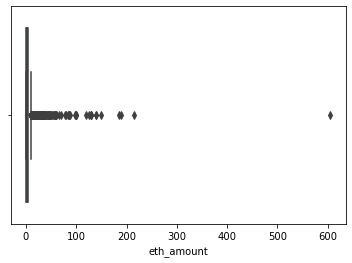

In [72]:
sns.boxplot(master_df['eth_amount']);

In [73]:
z = np.abs(stats.zscore(master_df['eth_amount']))

outliers = [] 
outliers.append(np.where(z>3))
outliers

[(array([3559, 3985, 4048, 4078, 4212, 4394, 4421, 4712, 4726, 4905, 5147,
         5267, 5286, 5314, 5515, 5650, 5761, 6030, 6031, 6114, 6289, 6354,
         6398, 6403, 6557, 6610, 6657, 6757, 6790, 6791, 6855, 7132, 7261,
         7288, 7300, 7301, 7313, 7316, 7359, 7369, 7462, 7482, 7487, 7506,
         7508, 7557, 7582, 7632, 7635, 7678, 7803, 7811, 7842, 7843, 7880,
         7881, 7901, 8031, 8120, 8122, 8130, 8133, 8137, 8163, 8182, 8187,
         8223, 8244, 8253, 8272, 8274, 8293, 8393, 8409, 8420, 8421],
        dtype=int64),)]

C:\Users\tsuts\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


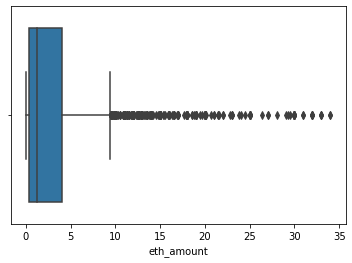

In [74]:
master_df = master_df[(np.abs(stats.zscore(master_df['eth_amount'])) < 3)]
sns.boxplot(master_df['eth_amount']);

In [75]:
sell_df = pd.DataFrame(master_df.groupby(['date'])['floor_price', 'eth_amount'].min()).reset_index()

<ipython-input-75-0760e1980e71>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sell_df = pd.DataFrame(master_df.groupby(['date'])['floor_price', 'eth_amount'].min()).reset_index()


In [78]:
sell_df['date'] = pd.to_datetime(sell_df['date'])
sell_df.set_index('date', inplace=True)
sell_df.head()

,floor_price,eth_amount
date,,
2017-06-23,0.03,0.00
2017-06-24,0.01,0.01
2017-06-25,0.10,0.05
2017-06-26,0.01,0.01
2017-06-27,0.01,0.01


In [81]:
sell_df = sell_df[sell_df['floor_price'] < 35]


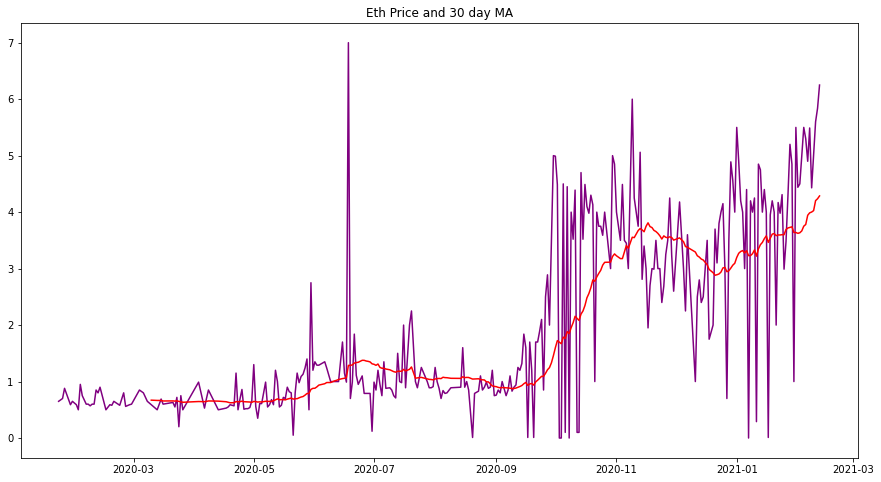

In [82]:
plt.figure(figsize = (15, 8))
plt.plot(sell_df['eth_amount'][500:], color = 'purple')
plt.plot(sell_df['eth_amount'][500:].rolling(30).mean(), color = 'red')
plt.title('Eth Price and 30 day MA');

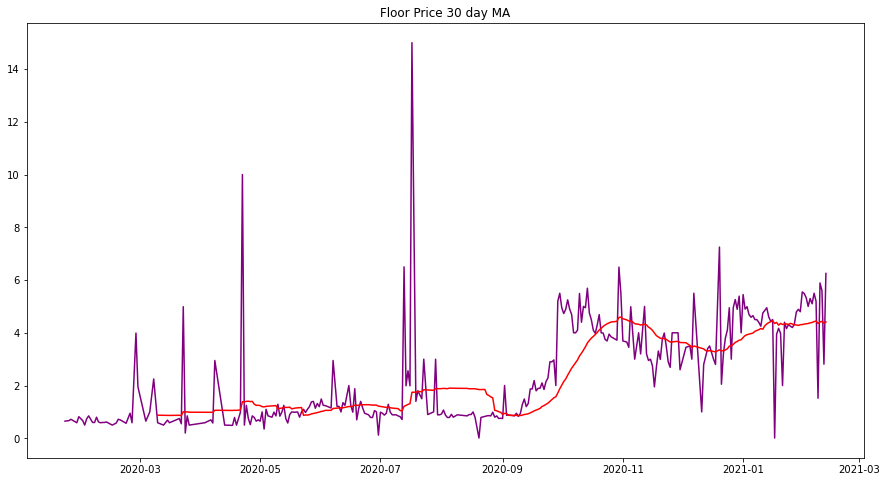

In [83]:
plt.figure(figsize = (15, 8))
plt.plot(sell_df['floor_price'][500:], color = 'purple')
plt.plot(sell_df['floor_price'][500:].rolling(30).mean(), color = 'red')
plt.title('Floor Price 30 day MA');

In [261]:
master_df.isnull().sum()

tx_type                0
date                   0
punk_id                0
transfer_count         0
eth_amount             0
dollar_amount          0
floor_price          295
mean_offer           295
median_offer         295
min_sale_price       295
min_bid              507
mean_bid             507
median_bid           507
floor_sale_target      0
discount_target        0
premium_target         0
dtype: int64

In [263]:
def nans(df): return df[df.isnull().any(axis=1)]
nans(master_df)


,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,min_bid,mean_bid,median_bid,floor_sale_target,discount_target,premium_target
881,Sold,2017-08-15,2216,1.0,0.24,69,0.24,0.663810,0.55,0.17,NaN,NaN,NaN,1,0,0
882,Sold,2017-08-15,4532,0.0,0.17,50,0.24,0.663810,0.55,0.17,NaN,NaN,NaN,0,1,0
883,Sold,2017-08-15,9665,0.0,0.24,69,0.24,0.663810,0.55,0.17,NaN,NaN,NaN,1,0,0
884,Sold,2017-08-15,4161,0.0,0.25,72,0.24,0.663810,0.55,0.17,NaN,NaN,NaN,0,0,1
885,Sold,2017-08-16,5716,1.0,0.45,136,0.22,0.395294,0.50,0.25,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4651,Sold,2020-08-22,4423,1.0,1.00,390,NaN,NaN,NaN,NaN,0.7,4.85,4.85,0,0,0
4662,Sold,2020-08-24,5522,2.0,2.80,1096,0.85,5.047500,3.42,1.10,NaN,NaN,NaN,0,0,1
4663,Sold,2020-08-24,9163,1.0,1.10,444,0.85,5.047500,3.42,1.10,NaN,NaN,NaN,0,0,1
4664,Sold,2020-08-24,5553,0.0,1.20,485,0.85,5.047500,3.42,1.10,NaN,NaN,NaN,0,0,1


In [264]:
master_df.drop(columns=['min_bid', 'mean_bid', 'median_bid'], inplace=True)
nans(master_df)


C:\Users\tsuts\anaconda3\lib\site-packages\pandas\core\frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,floor_sale_target,discount_target,premium_target
933,Sold,2017-09-10,6603,0.0,0.22,66,NaN,NaN,NaN,NaN,0,0,0
934,Sold,2017-09-10,9381,1.0,0.25,75,NaN,NaN,NaN,NaN,0,0,0
935,Sold,2017-09-10,2328,0.0,0.22,66,NaN,NaN,NaN,NaN,0,0,0
985,Sold,2017-10-04,3669,5.0,0.20,58,NaN,NaN,NaN,NaN,0,0,0
1027,Sold,2017-10-30,5344,0.0,0.23,71,NaN,NaN,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4632,Sold,2020-08-12,7967,1.0,0.99,378,NaN,NaN,NaN,NaN,0,0,0
4648,Sold,2020-08-22,4602,0.0,1.00,389,NaN,NaN,NaN,NaN,0,0,0
4649,Sold,2020-08-22,3044,1.0,0.80,312,NaN,NaN,NaN,NaN,0,0,0
4650,Sold,2020-08-22,2503,1.0,1.00,390,NaN,NaN,NaN,NaN,0,0,0


In [265]:
master_df.dropna(inplace=True)

<ipython-input-265-96a55e40367e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df.dropna(inplace=True)


In [267]:
# create 30 day MA column 
master_df['30_day_MA'] = master_df['floor_price'].rolling(30).mean()
master_df['30_day_MA']

<ipython-input-267-412d123eae09>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['30_day_MA'] = master_df['floor_price'].rolling(30).mean()


0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
8417    3.182000
8418    3.089000
8419    2.996000
8422    2.903000
8423    2.924667
Name: 30_day_MA, Length: 8053, dtype: float64

In [270]:
master_df.dropna(inplace=True)

<ipython-input-270-96a55e40367e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df.dropna(inplace=True)


In [271]:
# add above 30 day MA sale column 
above_30_day = []
for i in master_df.index: 
    if master_df['eth_amount'][i] > master_df['30_day_MA'][i]: 
        above_30_day.append(1)
    else: 
        above_30_day.append(0)

master_df['above_30_day'] = above_30_day
master_df

<ipython-input-271-8336169ab5dc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['above_30_day'] = above_30_day


,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,floor_price,mean_offer,median_offer,min_sale_price,floor_sale_target,discount_target,premium_target,30_day_MA,above_30_day
29,Sold,2017-06-24,9131,0.0,0.15,46,0.01,9.498571,1.100,0.01,0,0,1,0.023333,1
30,Sold,2017-06-24,4509,0.0,0.20,61,0.01,9.498571,1.100,0.01,0,0,1,0.022667,1
31,Sold,2017-06-24,4445,0.0,0.35,107,0.01,9.498571,1.100,0.01,0,0,1,0.022000,1
32,Sold,2017-06-24,5921,0.0,0.36,110,0.01,9.498571,1.100,0.01,0,0,1,0.021333,1
33,Sold,2017-06-24,8142,0.0,0.30,91,0.01,9.498571,1.100,0.01,0,0,1,0.020667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8417,Sold,2021-02-11,2417,0.0,6.99,12247,2.81,48.634911,15.245,5.84,0,0,1,3.182000,1
8418,Sold,2021-02-11,5614,2.0,5.90,10544,2.81,48.634911,15.245,5.84,0,0,1,3.089000,1
8419,Sold,2021-02-11,4041,0.0,20.00,34457,2.81,48.634911,15.245,5.84,0,0,1,2.996000,1
8422,Sold,2021-02-11,3986,0.0,7.05,12660,2.81,48.634911,15.245,5.84,0,0,1,2.903000,1


In [272]:
master_df['above_30_day'].value_counts(normalize=True)

1    0.679586
0    0.320414
Name: above_30_day, dtype: float64

In [273]:
# save master to csv 
master_df.to_csv('./data/master.csv', index=False)

In [73]:
offered_df = punks[punks['tx_type'] ==  'Offered'].sort_values(by='date').reset_index(drop=True)
offered_df['eth_amount'] = offered_df['eth_amount'].astype(float)
offered_df['dollar_amount'] = offered_df['dollar_amount'].astype(float)
x_1 = pd.DataFrame(offered_df.groupby('date')['eth_amount'].min())
x_1

,eth_amount
date,
2017-01-04,9.99
2017-05-22,0.75
2017-06-23,0.00
2017-06-24,0.01
2017-06-25,0.10
...,...
2021-02-09,5.89
2021-02-10,5.60
2021-02-11,2.81


In [75]:
offer_withdrawn_df = punks[punks['tx_type'] ==  'Offer Withdrawn'].sort_values(by='date').reset_index(drop=True)
offer_withdrawn_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
0,Offer Withdrawn,2017-06-24,8349,3.0,no_amount,
1,Offer Withdrawn,2017-06-24,4445,0.0,no_amount,
2,Offer Withdrawn,2017-06-24,5921,0.0,no_amount,
3,Offer Withdrawn,2017-06-24,9439,0.0,no_amount,
4,Offer Withdrawn,2017-06-24,6089,0.0,no_amount,
...,...,...,...,...,...,...
3159,Offer Withdrawn,2021-02-11,5217,4.0,no_amount,
3160,Offer Withdrawn,2021-02-11,3056,1.0,no_amount,
3161,Offer Withdrawn,2021-02-11,6487,1.0,no_amount,
3162,Offer Withdrawn,2021-02-11,6868,1.0,no_amount,


In [ ]:
offer_withdrawn_df['eth_amount'] = offer_withdrawn_df['eth_amount'].astype(float)
offer_withdrawn_df['dollar_amount'] = offer_withdrawn_df['dollar_amount'].astype(float)
x_2 = pd.DataFrame(offer_withdrawn_df.groupby('date')['eth_amount'].min())
x_2

In [ ]:
# create bid column 
bids = []
for i in master_df['tx_type']: 
    if i == 'Bid': 
        bids.append(1)
    else: 
        bids.append(0)
master_df['bid'] = bids


# create bid withdrawn column 
bid_withdrawn = []
for bid in master_df['tx_type']: 
    if bid 'Bid Withdrawn': 
        bid_withdrawn.append(1)
    else: 
        bid_withdrawn.append(0)
master_df['bid_withdrawn'] = bid_withdrawn


#create offer withdrawn column 
offer_withdrawn = []
for offer in master_df['tx_type']: 
    if offer == 'Offer Withdrawn':
        offer_withdrawn.append(1)
    else: 
        offer_withdrawn.append(0)
master_df['offer_withdrawn'] = offer_withdrawn

# create relative market

,eth_amount_x,eth_amount_y
date,,
2017-01-04,9.99,NaN
2017-05-22,0.75,NaN
2017-06-23,0.00,0.00
2017-06-24,0.01,0.01
2017-06-25,0.10,0.05
...,...,...
2021-02-09,5.89,5.00
2021-02-10,5.60,5.60
2021-02-11,2.81,5.84


In [ ]:
punk_id_df = {}

for i in id_list:
    punk_id_df[i] = punks[punks['punk_id'] == i]
    
punk_id_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
0,Offered,2017-01-04,7972,2.0,9.99,12306
1,Offered,2017-05-22,1690,1.0,0.75,612
2,Offered,2017-06-23,6934,1.0,0.09,29
3,Offered,2017-06-23,1841,1.0,0.25,82
4,Offered,2017-06-23,9875,0.0,5,1634
...,...,...,...,...,...,...
19479,Offered,2021-02-12,9340,1.0,50,89360
19480,Offered,2021-02-12,6468,1.0,10.75,18816
19481,Offered,2021-02-12,8821,1.0,16,28008
19482,Offered,2021-02-12,8754,1.0,8,14191


In [491]:
len(offered_df['punk_id'].unique())

4424

In [477]:
sales_df = punks[punks['tx_type'] == 'Sold'].sort_values(by='date').reset_index(drop=True)
sales_df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
0,Sold,2017-06-23,4641,0.0,0.20,65
1,Sold,2017-06-23,5916,0.0,0.30,98
2,Sold,2017-06-23,5719,1.0,0.04,13
3,Sold,2017-06-23,3134,2.0,0,3
4,Sold,2017-06-23,5621,0.0,0.03,10
...,...,...,...,...,...,...
8419,Sold,2021-02-11,9947,2.0,8.88,15299
8420,Sold,2021-02-11,4041,0.0,20,34457
8421,Sold,2021-02-11,2481,1.0,7.10,12749
8422,Sold,2021-02-11,4186,0.0,5.90,10559


In [488]:
len(sales_df['punk_id'].unique())

3990

In [485]:
floor_price = []
#offered_count = 0
#sales_count = 0

for i in range(len(offered_df['punk_id'])):
    count = 0
    for j in sales_df['punk_id']:
        if j == offered_df['punk_id'][i]: # check same IDs
            
            if offered_df['eth_amount'][i] == sales_df['eth_amount'][count]: 
                floor_price.append('not_floor')
            
            else: 
                floor_price.append(offered_df['eth_amount'][i])
                
            count+=1
    
floor_price

KeyboardInterrupt: 

In [371]:
# finding sale prices against each offer 

#ids = list(offered_df['punk_id'])


sales = []
#offered_count = 0
#sales_count = 0

for i in range(len(offered_df['punk_id'])):
    
    for j in range(len(sales_df['punk_id'])):
        
        if offered_df['punk_id'][i] == sales_df['punk_id'][j]: 
            
            
            if offered_df['eth_amount'][i] == sales_df['eth_amount'][j]:
                
                sales.append(offered_df['eth_amount'][i])
            
    
sales        

['9.99',
 '0.09',
 '0.25',
 '0.06',
 '10',
 '1',
 '0.06',
 '0.12',
 '0.03',
 '0.04',
 '0.03',
 '0.30',
 '0.13',
 '1.10',
 '0.30',
 '0.30',
 '0.30',
 '1',
 '1',
 '0.30',
 '0',
 '0.20',
 '0.11',
 '0.10',
 '0.06',
 '0.30',
 '0.30',
 '0.36',
 '0.30',
 '1.50',
 '0.50',
 '1.30',
 '0.01',
 '0.33',
 '0.35',
 '0.70',
 '0.30',
 '0.40',
 '0.01',
 '1',
 '1.30',
 '1',
 '0.50',
 '1.40',
 '1',
 '1.80',
 '0.70',
 '1',
 '0.30',
 '0.30',
 '0.30',
 '0.90',
 '0.30',
 '1',
 '0.25',
 '0.35',
 '1.20',
 '0.80',
 '1',
 '0.30',
 '0.20',
 '0.15',
 '0.90',
 '0.25',
 '0.60',
 '1',
 '0.20',
 '0.60',
 '0.70',
 '0.50',
 '0.90',
 '1',
 '0.10',
 '0.50',
 '0.90',
 '1.50',
 '1',
 '0.70',
 '0.80',
 '5',
 '1.10',
 '1',
 '0.15',
 '0.33',
 '0.18',
 '0.50',
 '0.01',
 '8',
 '0.29',
 '0.14',
 '0.34',
 '0.38',
 '0.15',
 '0.25',
 '3.14',
 '0.90',
 '0.30',
 '0.14',
 '1.80',
 '0.38',
 '0.25',
 '0.50',
 '0.33',
 '0.15',
 '2',
 '0.90',
 '0.15',
 '0.90',
 '0.23',
 '1.50',
 '0.30',
 '1.20',
 '10',
 '10',
 '0.10',
 '0.60',
 '0.69',
 '0.

In [375]:
len(sales)

6133

In [382]:
floor_price = []
#offered_count = 0
#sales_count = 0



for i in range(len(offered_df['punk_id'])):
    count = 0
    for j in sales_df['punk_id']:
        
        if j == offered_df['punk_id'][i]: # check same IDs
            floor_price.append(sales_df['eth_amount'][count])
            
        else: 
            floor_price.append(offered_df['eth_amount'][i])
        count+=1
    
floor_price

['9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 '9.99',
 

In [379]:
offered_df['floor_price_one'] = floor_price

ValueError: Length of values (54067) does not match length of index (19484)

In [ ]:
# finding offers that were withdrawn 
withdrawn_offer_df = punks[punks['tx_type'] == 'Offer Withdrawn'].sort_values(by='date').reset_index(drop=True)



In [372]:
floor_price_two = []
#offered_count = 0
#sales_count = 0



for i in range(len(offered_df['punk_id'])):
    
    for j in range(len(withdrawn_offer_df['punk_id'])):
        
        if offered_df['punk_id'][i] == withdrawn_offer_df['punk_id'][j]: 
            
            
            if offered_df['eth_amount'][i] == withdrawn_offer_df['eth_amount'][j]:
                
                floor_price_two.append('not_floor')
            
            else: 
                floor_price_two.append(offered_df['eth_amount'][i])
    
floor_price_two

6133

In [243]:
id_list = list(punks['punk_id'].unique())

punk_id_df = {}

for i in id_list:
    punk_id_df[i] = punks[punks['punk_id'] == i]
    
punk_id_df

{8183:           tx_type       date  punk_id  transfer_count eth_amount dollar_amount
 0         Offered 2021-02-11     8183             0.0      99.99        172678
 1            Sold 2020-09-20     8183             0.0       6.50          2472
 2   Bid Withdrawn 2020-05-28     8183             0.0       3.50           724
 3         Offered 2020-05-27     8183             0.0       6.50          1337
 4             Bid 2020-05-27     8183             0.0       3.50           720
 5   Bid Withdrawn 2020-01-15     8183             0.0       1.20           199
 6             Bid 2020-01-14     8183             0.0       1.20           196
 7   Bid Withdrawn 2017-07-19     8183             0.0       0.40            78
 8             Bid 2017-07-19     8183             0.0       0.40            78
 9            Sold 2017-07-06     8183             0.0       0.25            66
 10        Offered 2017-07-06     8183             0.0       0.25            66,
 8184:    tx_type       date  pun

In [246]:
most_txs = punk_id_df[0]

for key in punk_id_df:
    if len(punk_id_df[key]) > len(most_txs): 
        most_txs = punk_id_df[key] 
    else: 
        continue 
most_txs       

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
9969,Bid,2021-02-06,2204,1.0,157.85,267117
9970,Bid,2021-01-24,2204,1.0,100,131852
9971,Bid Withdrawn,2021-01-23,2204,1.0,73.50,88893
9972,Bid,2021-01-17,2204,1.0,73.50,89688
9973,Bid,2021-01-17,2204,1.0,1.50,1830
...,...,...,...,...,...,...
10035,Bid,2017-06-27,2204,1.0,0.44,126
10036,Bid,2017-06-27,2204,1.0,0.43,123
10037,Bid,2017-06-26,2204,1.0,0.21,53
10038,Bid,2017-06-26,2204,1.0,0.20,51


In [248]:
most_txs['tx_type'].unique()

array(['Bid', 'Bid Withdrawn'], dtype=object)

In [258]:
df = punk_id_df[5241].sort_values(by='date')



In [259]:
df = df[df['tx_type'] != 'Bid Withdrawn']

In [260]:
df = df[df['tx_type'] != 'Bid']

In [261]:
df

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount
28323,Offered,2019-07-12,5241,3.0,0.75,207
28322,Offered,2019-10-14,5241,3.0,0.75,140
28321,Offered,2019-10-26,5241,3.0,0.50,90
28320,Offered,2019-11-04,5241,3.0,0.40,75
28319,Offered,2019-11-20,5241,3.0,0.39,68
28315,Sold,2019-11-23,5241,3.0,0.26,40
28316,Offered,2019-11-23,5241,3.0,0.26,40
28317,Sold,2019-11-23,5241,3.0,0.25,38
28318,Offered,2019-11-23,5241,3.0,0.25,38
28314,Offered,2020-01-05,5241,3.0,10,1363


In [ ]:
for i in df['']

In [ ]:
from heapq import heapify, heappush, heappop
offers_dict = {}
heap = []
heapify(heap)
for row in punks:
    if row['tx_type'] == 'Offered':
        offers_dict[row['punk_id']] = row['eth_amount'] # add new amount to offers dict
        # if new offer is higher than existing offer amount, do we overwrite existing? if not, then:
        # if offers_dict[row['punk_id']] > row['eth_amount']:
            # offers_dict[row['punk_id']] = row['eth_amount']
        heappush(heap, row['eth_amount'])     # add new amount to heap, re-order
        lowest_available_offer = heap[0]      # get first item in heap as lowest current offer
        # update row with lowest_available_offer
    elif row['tx_type'] == 'Sold':
        offers_dict.pop(row['punk_id'], None) # remove sold punk from offers dict
        heap = list(offers_dict.values())     # convert current open offers to heap
        heapify(heap)                         # re-order heap
        lowest_available_offer = heap[0]      # get first item in heap as lowest current offer
        # update row with lowest_available_offer

In [112]:
punks.shape

(50414, 6)

In [113]:
punks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 52953
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tx_type         50414 non-null  object        
 1   date            50414 non-null  datetime64[ns]
 2   punk_id         50414 non-null  int64         
 3   transfer_count  50414 non-null  float64       
 4   eth_amount      50414 non-null  object        
 5   dollar_amount   50414 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 2.7+ MB


- the to and from cols might be really interesting pieces of data to explore 
- perhaps the identity of the owner of a punk increases its sale price via some sort of celebrity effect
- but investigating this type of relationship falls outside of the scope of this project 
- I'm strictly most concerned about the dynamics of price action (not necessarily making arguments as to why a certain person holding a punk makes that punk more valuable )

#### Encode tx_type column 

In [161]:
offered = [1 if i == 'Offered' else 0 for i in punks['tx_type']]
bid = [1 if i == 'Bid' else 0 for i in punks['tx_type']]
sold = [1 if i == 'Sold' else 0 for i in punks['tx_type']]
bid_withdrawn = [1 if i == 'Bid Withdrawn' else 0 for i in punks['tx_type']]
offer_withdrawn = [1 if i == 'Bid Offer Withdrawn' else 0 for i in punks['tx_type']]

In [165]:
punks['offered'] = offered
punks['bid'] = bid
punks['sold'] = sold
punks['bid_withdrawn'] = bid_withdrawn
punks['offer_withdrawn'] = offer_withdrawn
punks.head()

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,offered,bid,sold,bid_withdrawn,offer_withdrawn
0,Offered,2021-02-11,8183,0.0,99.99,172678,1,0,0,0,0
1,Sold,2020-09-20,8183,0.0,6.50,2472,0,0,1,0,0
2,Bid Withdrawn,2020-05-28,8183,0.0,3.50,724,0,0,0,1,0
3,Offered,2020-05-27,8183,0.0,6.50,1337,1,0,0,0,0
4,Bid,2020-05-27,8183,0.0,3.50,720,0,1,0,0,0


In [176]:
len(punk_id_df[5])

7

In [182]:
range(len(punk_id_df))

range(0, 6542)

In [187]:
punk_id_df[11]

KeyError: 11

In [ ]:
from heapq import heapify, heappush, heappop
offers_dict = {}
heap = []
heapify(heap)
for row in punks:
    if row['tx_type'] == 'Offered':
        offers_dict[row['punk_id']] = row['eth_amount'] # add new amount to offers dict
        # if new offer is higher than existing offer amount, do we overwrite existing? if not, then:
        # if offers_dict[row['punk_id']] > row['eth_amount']:
            # offers_dict[row['punk_id']] = row['eth_amount']
        heappush(heap, row['eth_amount'])     # add new amount to heap, re-order
        lowest_available_offer = heap[0]      # get first item in heap as lowest current offer
        # update row with lowest_available_offer
    elif row['tx_type'] == 'Sold':
        offers_dict.pop(row['punk_id'], None) # remove sold punk from offers dict
        heap = list(offers_dict.values())     # convert current open offers to heap
        heapify(heap)                         # re-order heap
        lowest_available_offer = heap[0]      # get first item in heap as lowest current offer
        # update row with lowest_available_offer

## EDA: 
 How am I going to set up my data 



In [163]:
sorted_punks = punks.sort_values(by='date')
sorted_punks.reset_index(inplace=True, drop=True)
sorted_punks

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,offered,bid,sold,bid_withdrawn,offer_withdrawn
0,Offered,2017-01-04,7972,2.0,9.99,12306,1,0,0,0,0
1,Offered,2017-05-22,1690,1.0,0.75,612,1,0,0,0,0
2,Bid,2017-06-23,9999,1.0,0.15,50,0,1,0,0,0
3,Sold,2017-06-23,4641,0.0,0.20,65,0,0,1,0,0
4,Bid,2017-06-23,5736,0.0,0.05,15,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
50409,Bid,2021-02-12,8944,1.0,8,14372,0,1,0,0,0
50410,Bid,2021-02-12,8909,1.0,2,3543,0,1,0,0,0
50411,Offered,2021-02-12,8754,1.0,8,14191,1,0,0,0,0
50412,Bid Withdrawn,2021-02-12,8194,1.0,16,28120,0,0,0,1,0


In [ ]:
# pop = sold 
# push = offered
# for dictionary 
# key = punk_id 
# value = eth_amount

floor_price_dict = {
    
}

floor_price = []

for i in sorted_punks['tx_type']:
    if i == 'Offered': 
        #push id, eth_amount to dictionary 
    elif i == 'Sold': 
        # pop id, eth_amount from dictionary


In [51]:
sorted_punks['offered'].unique()

array([1, 0], dtype=int64)

In [53]:
offered_df = sorted_punks[sorted_punks['offered']==1]
offered_df

,tx_type,date,id,transfer_count,eth_amount,dollar_amount,offered,bid,sold,bid_withdrawn,offer_withdrawn
0,Offered,2017-01-04,7972,2.0,9.99,12306,1,0,0,0,0
1,Offered,2017-05-22,1690,1.0,0.75,612,1,0,0,0,0
6,Offered,2017-06-23,4641,0.0,0.20,65,1,0,0,0,0
8,Offered,2017-06-23,5719,1.0,0.04,13,1,0,0,0,0
11,Offered,2017-06-23,5702,1.0,1,327,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
50404,Offered,2021-02-12,8215,1.0,6.25,11170,1,0,0,0,0
50405,Offered,2021-02-12,8682,1.0,7.77,13812,1,0,0,0,0
50408,Offered,2021-02-12,6468,1.0,10.75,18816,1,0,0,0,0
50411,Offered,2021-02-12,8754,1.0,8,14191,1,0,0,0,0


In [56]:
len(offered_df['eth_amount'].unique())

1166

In [164]:
# create amount for each tx column 
eth_offered_amount = []
usd_offered_amount = []
for i in range(len(sorted_punks)): 
    if sorted_punks['offered'][i] == 1: 
        eth_offered_amount.append(sorted_punks['eth_amount'][i])
        usd_offered_amount.append(sorted_punks['dollar_amount'][i])
    else: 
        eth_offered_amount.append('no_amount')
        usd_offered_amount.append('no_amount')
sorted_punks['offered_amount_eth'] = eth_offered_amount
sorted_punks['offered_amount_usd'] = usd_offered_amount


eth_bid_amount = []
usd_bid_amount = []
for i in range(len(sorted_punks)): 
    if sorted_punks['bid'][i] == 1: 
        eth_bid_amount.append(sorted_punks['eth_amount'][i])
        usd_bid_amount.append(sorted_punks['dollar_amount'][i])
    else: 
        eth_bid_amount.append('no_amount')
        usd_bid_amount.append('no_amount')
sorted_punks['bid_amount_eth'] = eth_bid_amount
sorted_punks['bid_amount_usd'] = usd_bid_amount


eth_sold_amount = []
usd_sold_amount = []
for i in range(len(sorted_punks)): 
    if sorted_punks['sold'][i] == 1: 
        eth_sold_amount.append(sorted_punks['eth_amount'][i])
        usd_sold_amount.append(sorted_punks['dollar_amount'][i])
    else: 
        eth_sold_amount.append('no_amount')
        usd_sold_amount.append('no_amount')
sorted_punks['sold_amount_eth'] = eth_sold_amount
sorted_punks['sold_amount_usd'] = usd_sold_amount

eth_bid_withdrawn_amount = []
usd_bid_withdrawn_amount = []
for i in range(len(sorted_punks)): 
    if sorted_punks['bid_withdrawn'][i] == 1: 
        eth_bid_withdrawn_amount.append(sorted_punks['eth_amount'][i])
        usd_bid_withdrawn_amount.append(sorted_punks['dollar_amount'][i])
    else: 
        eth_bid_withdrawn_amount.append('no_amount')
        usd_bid_withdrawn_amount.append('no_amount')
sorted_punks['bid_withdrawn_amount_eth'] = eth_bid_withdrawn_amount
sorted_punks['bid_withdrawn_amount_usd'] = usd_bid_withdrawn_amount



eth_offer_withdrawn_amount = []
usd_offer_withdrawn_amount = []
for i in range(len(sorted_punks)): 
    if sorted_punks['offer_withdrawn'][i] == 1: 
        eth_offer_withdrawn_amount.append(sorted_punks['eth_amount'][i])
        usd_offer_withdrawn_amount.append(sorted_punks['dollar_amount'][i])
    else: 
        eth_offer_withdrawn_amount.append('no_amount')
        usd_offer_withdrawn_amount.append('no_amount')
sorted_punks['offer_withdrawn_amount_eth'] = eth_offer_withdrawn_amount
sorted_punks['offer_withdrawn_amount_usd'] = usd_offer_withdrawn_amount

sorted_punks

,tx_type,date,punk_id,transfer_count,eth_amount,dollar_amount,offered,bid,sold,bid_withdrawn,...,offered_amount_eth,offered_amount_usd,bid_amount_eth,bid_amount_usd,sold_amount_eth,sold_amount_usd,bid_withdrawn_amount_eth,bid_withdrawn_amount_usd,offer_withdrawn_amount_eth,offer_withdrawn_amount_usd
0,Offered,2017-01-04,7972,2.0,9.99,12306,1,0,0,0,...,9.99,12306,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount
1,Offered,2017-05-22,1690,1.0,0.75,612,1,0,0,0,...,0.75,612,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount
2,Bid,2017-06-23,9999,1.0,0.15,50,0,1,0,0,...,no_amount,no_amount,0.15,50,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount
3,Sold,2017-06-23,4641,0.0,0.20,65,0,0,1,0,...,no_amount,no_amount,no_amount,no_amount,0.20,65,no_amount,no_amount,no_amount,no_amount
4,Bid,2017-06-23,5736,0.0,0.05,15,0,1,0,0,...,no_amount,no_amount,0.05,15,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50409,Bid,2021-02-12,8944,1.0,8,14372,0,1,0,0,...,no_amount,no_amount,8,14372,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount
50410,Bid,2021-02-12,8909,1.0,2,3543,0,1,0,0,...,no_amount,no_amount,2,3543,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount
50411,Offered,2021-02-12,8754,1.0,8,14191,1,0,0,0,...,8,14191,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount
50412,Bid Withdrawn,2021-02-12,8194,1.0,16,28120,0,0,0,1,...,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,16,28120,no_amount,no_amount


In [62]:
list(sorted_punks['offered_amount_eth'])

['9.99',
 '0.75',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 '0.20',
 'no_amount',
 '0.04',
 'no_amount',
 'no_amount',
 '1',
 '0.25',
 'no_amount',
 '1.50',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 '3',
 '10',
 'no_amount',
 '0.30',
 '3.14',
 '0.36',
 '5',
 '0.12',
 'no_amount',
 '777',
 'no_amount',
 '10',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 '1',
 '0.10',
 'no_amount',
 'no_amount',
 '6.90',
 'no_amount',
 '0.30',
 'no_amount',
 'no_amount',
 '0.30',
 'no_amount',
 '0.30',
 'no_amount',
 '150',
 'no_amount',
 'no_amount',
 '0.08',
 'no_amount',
 'no_amount',
 'no_amount',
 '10',
 'no_amount',
 '0.03',
 'no_amount',
 '0.06',
 '0.13',
 'no_amount',
 '0',
 'no_amount',
 '1.10',
 '0.03',
 '2.50',
 '0.06',
 '0.11',
 '2',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 'no_amount',
 '1.99',
 'no_amount',
 '1',
 'no_amoun

In [68]:
floor_price_df = pd.DataFrame(sorted_punks.groupby(['date'])['offered_amount_eth'].min())
floor_price_df['offered_amount_eth'].unique()

array(['9.99', '0.75', '0', '0.01', '0.10', '0.06', '0.14', '0.18',
       '0.20', '0.24', '0.25', '0.29', '0.32', '0.00', '0.05', '0.36',
       '0.08', '0.90', '0.40', '0.30', '0.03', '0.33', '0.37', '0.28',
       '0.58', '3', '12', '0.22', '0.17', '1', '0.23', 'no_amount',
       '0.12', '0.26', '0.27', '0.13', '0.45', '0.19', '0.15', '0.11',
       '0.09', '0.50', '0.07', '1.90', '0.35', '0.95', '0.85', '0.80',
       '2.49', '0.49', '2', '8.90', '0.02', '1.60', '1.85', '5', '18',
       '3.29', '0.16', '100', '0.31', '0.78', '0.39', '1.80', '499.99',
       '10', '0.99', '0.59', '50', '25', '5.50', '0.48', '20', '3.49',
       '1.39', '0.34', '1.50', '4.44', '2.20', '2.90', '30', '4.90', '42',
       '49.49', '0.60', '0.44', '0.70', '1.42', '1.95', '0.69', '0.43',
       '0.55', '0.65', '1.25', '4.50', '1.79', '0.42', '0.79', '1.99',
       '0.54', '1.28', '0.46', '1.45', '0.38', '0.68', '17.50', '2.50',
       '49.50', '4', '12.70', '37', '0.62', '990', '95', '1.75', '3.92',
   

In [61]:
floor_price_df = pd.DataFrame(sorted_punks.groupby(['date'])['offered_amount_eth'].min())
floor_price_df.reset_index(inplace=True)
floor_price_df.rename(columns={'date':'date1'}, inplace=True)
floor_price_df

,date1,offered_amount_eth
0,2017-01-04,9.99
1,2017-05-22,0.75
2,2017-06-23,0
3,2017-06-24,0.01
4,2017-06-25,0.10
...,...,...
1225,2021-02-09,11
1226,2021-02-10,10.49
1227,2021-02-11,10.49
1228,2021-02-12,10.75


In [ ]:
floor_price_df = pd.DataFrame(sorted_punks.groupby(['date'])['offered_amount_eth'].min())
floor_price_df.reset_index(inplace=True)
floor_price_df.rename(columns={'date':'date1'}, inplace=True)
floor_price_df

In [ ]:
floor_price_df = pd.DataFrame(sorted_punks.groupby(['date'])['offered_amount_eth'].min())


In [338]:
floor_price_df['offered_amount_eth'].unique()

array([9.99e+00, 7.50e-01, 0.00e+00, 4.50e-01, 1.90e-01, 2.00e-01,
       1.50e-01, 5.00e-01, 1.00e+00, 9.50e-01, 9.00e-01, 8.00e-01,
       4.00e-01, 8.00e-02, 1.20e-01, 9.00e-02, 1.85e+00, 1.80e-01,
       2.60e-01, 1.00e-01, 1.30e-01, 3.50e-01, 2.50e-01, 2.50e+01,
       3.00e-01, 3.20e-01, 1.50e+00, 5.00e+00, 6.00e-01, 4.50e+00,
       1.79e+00, 1.28e+00, 1.45e+00, 6.80e-01, 4.00e+00, 6.50e-01,
       9.90e+02, 4.40e-01, 3.30e-01, 2.35e+00, 9.90e-01, 3.10e+00,
       1.90e+00, 2.95e+00, 1.18e+00, 1.19e+00, 5.50e-01])

In [339]:
punks_df = pd.merge(sorted_punks, floor_price_df, left_on='date', right_on='date1', how='left').drop('date1', axis=1)


In [340]:
punks_df.rename(columns={'offered_amount_eth_y':'floor_price'}, inplace=True)
punks_df

,tx_type,date,id,transfer_count,eth_amount,dollar_amount,offered,bid,sold,bid_withdrawn,...,offered_amount_usd,bid_amount_eth,bid_amount_usd,sold_amount_eth,sold_amount_usd,bid_withdrawn_amount_eth,bid_withdrawn_amount_usd,offer_withdrawn_amount_eth,offer_withdrawn_amount_usd,floor_price
0,Offered,2017-01-04,7972,2.0,9.99,12306,1,0,0,0,...,12306.0,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,9.99
1,Offered,2017-05-22,1690,1.0,0.75,612,1,0,0,0,...,612.0,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,0.75
2,Bid,2017-06-23,9999,1.0,0.15,50,0,1,0,0,...,0.0,0.15,50,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,0.00
3,Sold,2017-06-23,4641,0.0,0.20,65,0,0,1,0,...,0.0,no_amount,no_amount,0.20,65,no_amount,no_amount,no_amount,no_amount,0.00
4,Bid,2017-06-23,5736,0.0,0.05,15,0,1,0,0,...,0.0,0.05,15,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50409,Bid,2021-02-12,8944,1.0,8,14372,0,1,0,0,...,0.0,8,14372,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,0.00
50410,Bid,2021-02-12,8909,1.0,2,3543,0,1,0,0,...,0.0,2,3543,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,0.00
50411,Offered,2021-02-12,8754,1.0,8,14191,1,0,0,0,...,14191.0,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,no_amount,0.00
50412,Bid Withdrawn,2021-02-12,8194,1.0,16,28120,0,0,0,1,...,0.0,no_amount,no_amount,no_amount,no_amount,16,28120,no_amount,no_amount,0.00


In [343]:
punks_df['floor_price'].unique()

array([9.99e+00, 7.50e-01, 0.00e+00, 4.50e-01, 1.90e-01, 2.00e-01,
       1.50e-01, 5.00e-01, 1.00e+00, 9.50e-01, 9.00e-01, 8.00e-01,
       4.00e-01, 8.00e-02, 1.20e-01, 9.00e-02, 1.85e+00, 1.80e-01,
       2.60e-01, 1.00e-01, 1.30e-01, 3.50e-01, 2.50e-01, 2.50e+01,
       3.00e-01, 3.20e-01, 1.50e+00, 5.00e+00, 6.00e-01, 4.50e+00,
       1.79e+00, 1.28e+00, 1.45e+00, 6.80e-01, 4.00e+00, 6.50e-01,
       9.90e+02, 4.40e-01, 3.30e-01, 2.35e+00, 9.90e-01, 3.10e+00,
       1.90e+00, 2.95e+00, 1.18e+00, 1.19e+00, 5.50e-01])

In [342]:
list(punks_df['floor_price'])

[9.99,
 0.75,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0

In [350]:
new_floor_price = []

temp_val = 0
for i in range(len(punks)): 
    #print(str(temp_val)+'initial')
    if punks_df['floor_price'][i] != 0:
     #   print('here')
        new_floor_price.append(punks_df['floor_price'][i])
        temp_val = punks_df['floor_price'][i]
    else: 
      #  print(str(temp_val)+'about to enter')
        new_floor_price.append(temp_val)

#    print(str(temp_val)+'copy')
punks_df['floor_price'] = new_floor_price
        

In [352]:
list(punks_df['floor_price'].unique())

[9.99,
 0.75,
 0.45,
 0.19,
 0.2,
 0.15,
 0.5,
 1.0,
 0.95,
 0.9,
 0.8,
 0.4,
 0.08,
 0.12,
 0.09,
 1.85,
 0.18,
 0.26,
 0.1,
 0.13,
 0.35,
 0.25,
 25.0,
 0.3,
 0.32,
 1.5,
 5.0,
 0.6,
 4.5,
 1.79,
 1.28,
 1.45,
 0.68,
 4.0,
 0.65,
 990.0,
 0.44,
 0.33,
 2.35,
 0.99,
 3.1,
 1.9,
 2.95,
 1.18,
 1.19,
 0.55]

In [236]:
punks_df['floor_price'].astype(float)

ValueError: could not convert string to float: 'no_amount'

In [749]:
offered_df = punks[punks['tx_type']=='Offered']
floor_price_df = pd.DataFrame(punks.groupby(['date'])['eth_amount'].min())

In [750]:
floor_price_df

,eth_amount
date,
2017-01-04,9.99
2017-05-22,0.75
2017-06-23,0.00
2017-06-24,0.00
2017-06-25,0.01
...,...
2021-02-09,0.00
2021-02-10,0.00
2021-02-11,0.00


In [751]:
punks = pd.merge(punks, floor_price_df, left_on='date', right_on='date', how='left')
punks


,tx_type,date,id,transfer_count,eth_amount_x,dollar_amount,eth_amount_y
0,Offered,2021-02-11,8183,0.0,99.99,172678.0,0.0
1,Sold,2020-09-20,8183,0.0,6.50,2472.0,0.0
2,Bid Withdrawn,2020-05-28,8183,0.0,3.50,724.0,0.0
3,Offered,2020-05-27,8183,0.0,6.50,1337.0,0.0
4,Bid,2020-05-27,8183,0.0,3.50,720.0,0.0
...,...,...,...,...,...,...,...
50409,Bid,2017-07-03,9999,1.0,0.25,69.0,0.0
50410,Bid,2017-07-03,9999,1.0,0.25,69.0,0.0
50411,Bid,2017-06-26,9999,1.0,0.20,51.0,0.0
50412,Bid,2017-06-23,9999,1.0,0.20,65.0,0.0
